# SVD分解

## NumPy调用

In [11]:
import numpy as np

A = np.arange(1, 7).reshape(3, 2)
print(A)

U, s, V = np.linalg.svd(A)
print(U)
print(s)
print(V)

np.round(V.T.dot(V), 4)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


array([[ 1., -0.],
       [-0.,  1.]])

## 重构原始矩阵

In [14]:
import numpy as np


A = np.arange(1, 7).reshape(3, 2)
print(A)

U, s, V = np.linalg.svd(A)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
print( np.diag(s))
print(Sigma)

B = U.dot(Sigma.dot(V))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[9.52551809 0.        ]
 [0.         0.51430058]]
[[9.52551809 0.        ]
 [0.         0.51430058]
 [0.         0.        ]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


## 重构原始矩阵 - 方阵的情况

In [19]:
import numpy as np


A = np.arange(1, 10).reshape(3, 3)
print(A)

U, s, V = np.linalg.svd(A)
Sigma = np.diag(s)

B = U.dot(Sigma.dot(V))
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


## SVD与线性变换

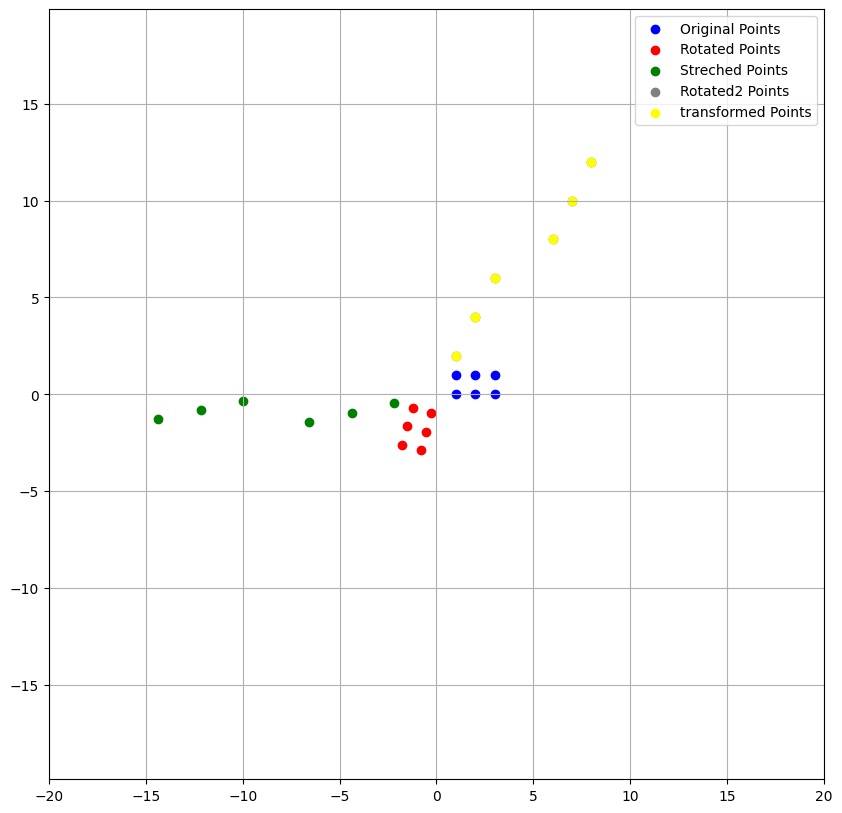

In [22]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [1, 2],
    [5, 6],
])
U, s, V = np.linalg.svd(A)

points = np.array([[1, 0], [2, 0], [3, 0], [1, 1], [2, 1], [3, 1]])


rotated = np.dot(points, U.T)
streched = rotated @ np.diag(s)
rotated2 = streched.dot(V)

transformed = points.dot(A)

plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], label='Original Points', color='blue')
plt.scatter(rotated[:, 0], rotated[:, 1], label='Rotated Points', color='red')
plt.scatter(streched[:, 0], streched[:, 1], label='Streched Points', color='green')
plt.scatter(rotated2[:, 0], rotated2[:, 1], label='Rotated2 Points', color='grey')
plt.scatter(transformed[:, 0], transformed[:, 1], label='transformed Points', color='yellow')

plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.show()

## 特征分解与SVD分解的关系

In [ ]:
import numpy as np

A = np.arange(1, 10).reshape(3, 3)
ATA = A.T.dot(A)
AAT = A.dot(A.T)


U, s, VT = np.linalg.svd(A)
V = VT.T

L = np.diag(s ** 2)


print(np.allclose(ATA.dot(V), V.dot(L)))
print(np.allclose(AAT.dot(U), U.dot(L)))

## 手工SVD分解

In [1]:
import numpy as np

A = np.arange(1, 13).reshape(3, 4)
U, s, VT = np.linalg.svd(A)
m, n = A.shape


eval_U, evec_U = np.linalg.eig(np.dot(A, A.T))
idx = eval_U.argsort()[::-1]
eval_U = eval_U[idx]
evec_U = evec_U[:,idx]
print('U\n{}\nevec_U\n{}\n'.format(U, evec_U))


eval_V, evec_V = np.linalg.eig(np.dot(A.T, A))
idx = eval_V.argsort()[::-1]
eval_V = eval_V[idx]
evec_V = evec_V[:,idx]
print('V\n{}\nevec_V\n{}\n'.format(VT.T, evec_V))

s2 = np.sqrt(eval_V[:min(m,n)])
print("s2:{}\ns{}".format(s2, s))

U
[[ 0.20673589  0.88915331  0.40824829]
 [ 0.51828874  0.25438183 -0.81649658]
 [ 0.82984158 -0.38038964  0.40824829]]
evec_U
[[-0.20673589 -0.88915331  0.40824829]
 [-0.51828874 -0.25438183 -0.81649658]
 [-0.82984158  0.38038964  0.40824829]]

V
[[ 0.40361757 -0.73286619  0.26153473 -0.48124795]
 [ 0.46474413 -0.28984978 -0.70741401  0.44672745]
 [ 0.52587069  0.15316664  0.63022384  0.55028893]
 [ 0.58699725  0.59618305 -0.18434456 -0.51576844]]
evec_V
[[-4.03617572e-01  7.32866192e-01 -1.19976920e-04  4.89586905e-01]
 [-4.64744130e-01  2.89849777e-01 -4.08088311e-01 -8.35819668e-01]
 [-5.25870689e-01 -1.53166638e-01  8.16536554e-01  2.02878621e-01]
 [-5.86997247e-01 -5.96183053e-01 -4.08328265e-01  1.43354142e-01]]

s2:[25.43683563  1.72261225         nan]
s[2.54368356e+01 1.72261225e+00 2.64839734e-16]


/tmp/ipykernel_1082/2641661405.py:21: RuntimeWarning: invalid value encountered in sqrt
  s2 = np.sqrt(eval_V[:min(m,n)])


In [35]:
import numpy as np

a = np.array([10,2,3,8,4,5,9])
a.argsort()

a[::-1]


array([ 9,  5,  4,  8,  3,  2, 10])

# 伪逆

## NumPy计算

In [10]:
import numpy as np

A = np.arange(1, 9).reshape(4, 2) / 10
print(A)

B = np.linalg.pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.0000000e+01 -5.0000000e+00  8.4040814e-15  5.0000000e+00]
 [ 8.5000000e+00  4.5000000e+00  5.0000000e-01 -3.5000000e+00]]


## 用SVD计算伪逆

In [12]:
import numpy as np

A = np.arange(1, 9).reshape(4, 2) / 10
B = np.linalg.pinv(A)
print('np: \n', B)

U, s, VT = np.linalg.svd(A)
d = 1.0 / s

D = np.zeros(A.shape)

D[:A.shape[1], :A.shape[1]] = np.diag(d)

B = VT.T.dot(D.T).dot(U.T)
print('my: \n', B)

np: 
 [[-1.0000000e+01 -5.0000000e+00  8.4040814e-15  5.0000000e+00]
 [ 8.5000000e+00  4.5000000e+00  5.0000000e-01 -3.5000000e+00]]
my: 
 [[-1.00000000e+01 -5.00000000e+00  8.39790527e-15  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


## 伪逆求最小二乘解

In [6]:
import numpy as np

n = 50
# 形状为50的vector，内容为1-500均匀分布的数字
a = np.linspace(1, 500, n)
print('a\n', np.round(a,2))

A = np.column_stack((np.ones(n), a,  a**2, a**3))
# print('A\n', A.shape)

x = np.array([3,1,8,7])


# 为了可重复验证
np.random.seed(1) 
# 根据假设的x和引入的随机误差，计算出b
b = A.dot(x) + np.random.normal(0, 1, n)

C = np.linalg.pinv(A)
# print(C)

x2 = C.dot(b)
print('x2: ', np.round(x2, 4))

b2 = A.dot(x2)

print('b2 - b: ', np.linalg.norm(b2 - b) ** 2)

print('b - b0:', np.linalg.norm(A.dot(x) - b) ** 2)
print('b2 - b0:', np.linalg.norm(b2 - A.dot(x)) ** 2)



a
 [  1.    11.18  21.37  31.55  41.73  51.92  62.1   72.29  82.47  92.65
 102.84 113.02 123.2  133.39 143.57 153.76 163.94 174.12 184.31 194.49
 204.67 214.86 225.04 235.22 245.41 255.59 265.78 275.96 286.14 296.33
 306.51 316.69 326.88 337.06 347.24 357.43 367.61 377.8  387.98 398.16
 408.35 418.53 428.71 438.9  449.08 459.27 469.45 479.63 489.82 500.  ]
x2:  [2.8991 1.0017 8.     7.    ]
b2 - b:  44.877463864707536
b - b0: 47.037719234170424
b2 - b0: 2.160256810572541


# SVD对图像压缩

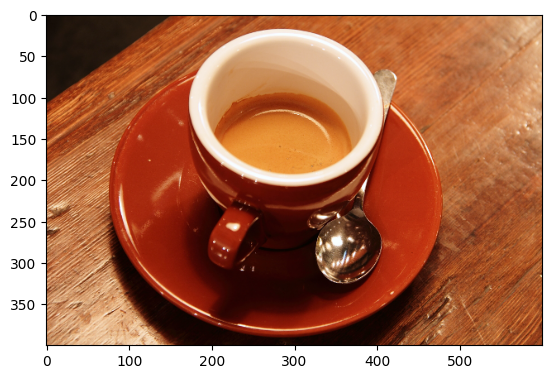

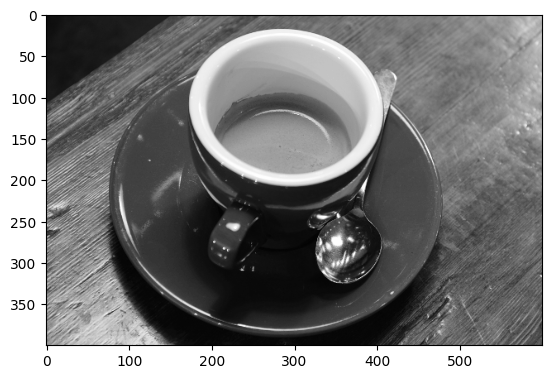

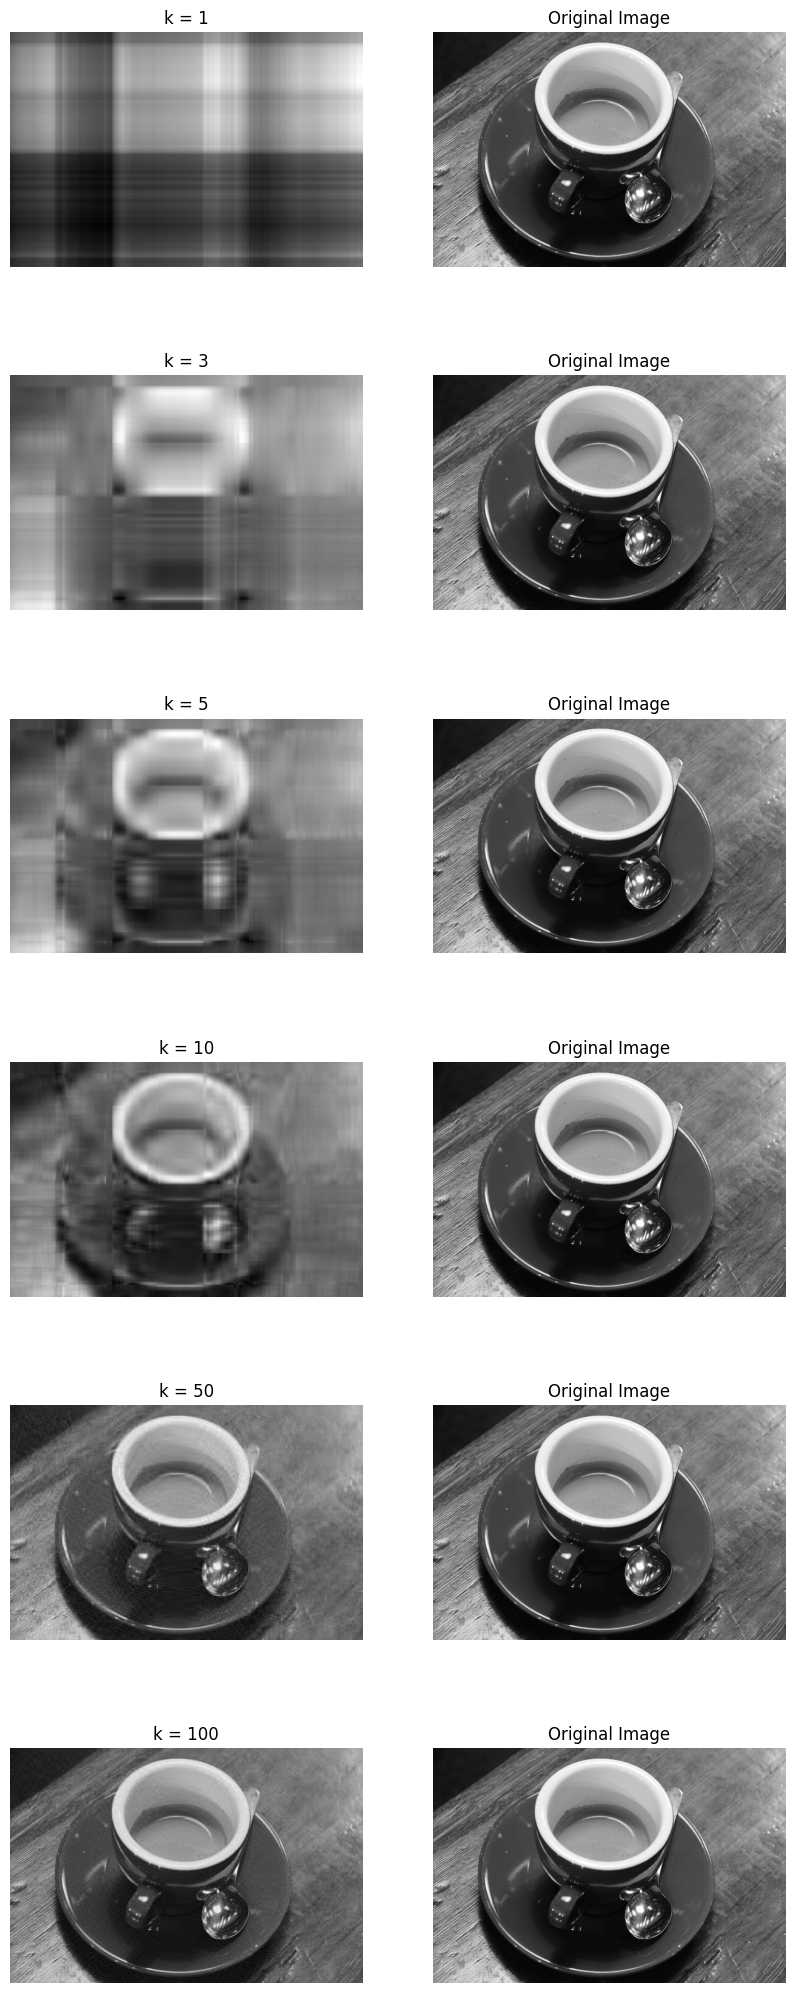

In [35]:
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

coffee = data.coffee()
plt.figure()
plt.imshow(coffee)

gray_coffee = rgb2gray(coffee)
U, S, V_T = np.linalg.svd(gray_coffee, full_matrices=False)

reconstructed_coffee = U @ np.diag(S) @ V_T
plt.figure()
plt.imshow(reconstructed_coffee, cmap='gray')


S = np.diag(S)
fig, ax = plt.subplots(6, 2, figsize=(10, 26))

curr_fig = 0
for r in [1, 3, 5, 10, 50, 100]:
    coffee_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]

    ax[curr_fig][0].imshow(coffee_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_coffee, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()

#测试

##1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [1, 2],
    [5, 6],
])
U, s, V = np.linalg.svd(A)

points = np.array([[1, 0], [2, 0], [3, 0], [1, 1], [2, 1], [3, 1]])


rotated = np.dot(points, U.T)
streched = rotated @ np.diag(s)
rotated2 = streched.dot(V)

transformed = points.dot(A)

plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], label='Original Points', color='blue')
plt.scatter(rotated_points[:, 0], rotated_points[:, 1], label='Rotated Points', color='red')
plt.scatter(streched[:, 0], streched[:, 1], label='Streched Points', color='green')
plt.scatter(rotated2[:, 0], rotated2[:, 1], label='Rotated2 Points', color='grey')
# plt.scatter(transformed[:, 0], transformed[:, 1], label='transformed Points', color='yellow')

plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.show()

##2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 原始点集
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])

# 转换为二维坐标点（NumPy列向量）
points = np.column_stack((x, y))
print(points.shape)

# 定义对角矩阵（例如，x方向缩放2倍，y方向缩放0.5倍）
D = np.array([[2, 0],
              [0, 0.5]])

# 应用对角矩阵变换
transformed_points = D.dot(points)

# 提取变换后的x和y坐标
transformed_x = transformed_points[:, 0]
transformed_y = transformed_points[:, 1]

# 绘制原始点和变换后的点
plt.figure(figsize=(8, 4))

# 绘制原始点
plt.plot(x, y, 'bo-', label='Original Points')

# 绘制变换后的点
plt.plot(transformed_x, transformed_y, 'rs-', label='Transformed Points')

# 添加图例和坐标轴标签
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Transformation of Points by a Diagonal Matrix')

# 显示图形
plt.grid(True)
plt.show()

In [25]:
import numpy as np

A = np.arange(1, 10).reshape(3, 3)
# U, s, V = np.linalg.svd(A)
# print(U)
# print(s)
# print(V)
# print(A)

B = A.T.dot(A)
C = A.dot(A.T)

L, V = np.linalg.eig(B)
print('B\n', B)
print('B2\n', V.dot(np.diag(L)).dot(np.linalg.inv(V)))

print(B.dot(V))
print(V.dot(np.diag(L)))
print(np.allclose(B.dot(V), V.dot(np.diag(L))))


L2, U = np.linalg.eig(C)
print(np.allclose(C.dot(U), U.dot(np.diag(L2))))


S = np.sqrt(np.diag(L))
# print(S)
# U.dot(S).dot(V.T)



B
 [[ 66  78  90]
 [ 78  93 108]
 [ 90 108 126]]
B2
 [[ 66.  78.  90.]
 [ 78.  93. 108.]
 [ 90. 108. 126.]]
[[-1.36158783e+02 -8.86525519e-01  5.55111512e-16]
 [-1.62471513e+02 -8.63895527e-02  1.48769885e-14]
 [-1.88784243e+02  7.13746414e-01  2.20934382e-14]]
[[-1.36158783e+02 -8.86525519e-01  4.22876189e-16]
 [-1.62471513e+02 -8.63895527e-02 -8.45752379e-16]
 [-1.88784243e+02  7.13746414e-01  4.22876189e-16]]
True
True


In [49]:
import numpy as np

M = np.arange(1, 10).reshape(3, 3)

B = M.T.dot(M)
C = M.dot(M.T)

L, V = np.linalg.eig(B)
L2, U = np.linalg.eig(C)

L = np.diag(L)
S = np.sqrt(L)
print(L)
print(np.allclose(S.dot(S), L))


print('BV=VL', np.allclose(B.dot(V), V.dot(L)))
print('B=VLVT', np.allclose(B, V.dot(L).dot(V.T) ))
print('B=VLVT', np.allclose(B, V.dot(L).dot(V.T) ))
print('B=V S UT U S VT', np.allclose( B, V.dot(S).dot(U.T).dot(U).dot(S).dot(V.T) ))
print('B=(U S VT)T U S VT', np.allclose( B, (U.dot(S).dot(V.T)).T.dot(U).dot(S).dot(V.T) ))
print('B=(U S VT)T (U S VT)', np.allclose( B, (U.dot(S).dot(V.T)).T.dot(U.dot(S).dot(V.T)) ))
print('U S VT\n', np.round(U.dot(S).dot(V.T), 4))
print('(U S VT)T\n', U.dot(S).dot(V.T).T)
print('(U S VT)T (U S VT)\n', (U.dot(S).dot(V.T)).T.dot(U.dot(S).dot(V.T)))
print('M\n', M)
print('MTM\n', M.T.dot(M))

print('M=U S VT', np.allclose( M, U.dot(S).dot(V.T) ))
print('B=MTM', np.allclose( B, M.T.dot(M) ))


[[2.83858587e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.14141342e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.03583089e-15]]
True
BV=VL True
B=VLVT True
B=VLVT True
B=V S UT U S VT True
B=(U S VT)T U S VT True
B=(U S VT)T (U S VT) True
U S VT
 [[2.4724 2.1435 1.8145]
 [4.4143 5.0404 5.6664]
 [6.3562 7.9373 9.5183]]
(U S VT)T
 [[2.47243559 4.41430559 6.35617561]
 [2.14348492 5.040373   7.93726102]
 [1.81453428 5.66644035 9.51834645]]
(U S VT)T (U S VT)
 [[ 66.  78.  90.]
 [ 78.  93. 108.]
 [ 90. 108. 126.]]
M
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
MTM
 [[ 66  78  90]
 [ 78  93 108]
 [ 90 108 126]]
M=U S VT False
B=MTM True


特征分解与SVD分解的关系

In [ ]:
import numpy as np

A = np.arange(1, 10).reshape(3, 3)
ATA = A.T.dot(A)
AAT = A.dot(A.T)


U, s, VT = np.linalg.svd(A)
V = VT.T

L = np.diag(s ** 2)


print(np.allclose(ATA.dot(V), V.dot(L)))
print(np.allclose(AAT.dot(U), U.dot(L)))


In [1]:
import numpy as np

A = np.array([[1,4,1],[-4,-7,1]], dtype = float)
U, Σ_array, V_transpose = np.linalg.svd(A)

print("U shape:{}, Σ_array shape:{}, and V_transpose shape:{}".format(U.shape, Σ_array.shape, V_transpose.shape))
print("U is:\n{},\n Σ_array is:\n {},\n and V_transpose is:\n {}".format(U, Σ_array, V_transpose))

m = A.shape[0]
n = A.shape[1]
Σ = np.zeros((m,n))
Σ[0: len(Σ_array), 0: len(Σ_array)] =  np.diag(Σ_array)
print(Σ)

print("Matrix constructed from original matrix:\n {}".format(U@Σ@V_transpose))
print("Original Matrix:\n{}".format(A))

eigen_values_U, eigen_vectors_U = np.linalg.eig(np.dot(A, A.T))  # gives U
# Sorting eigen_values_U and eigen_vectors_U in descending order of eigen_values_U
idx = eigen_values_U.argsort()[::-1]   
eigen_values_U = eigen_values_U[idx]
eigen_vectors_U = eigen_vectors_U[:,idx]
print("eigen_values_U received from AA^T:\n{}".format(eigen_values_U))
print("eigen_vectors_U received from AA^T:\n{} which is same as U obtained in SVD except in sign:\n{}".format(eigen_vectors_U, U))

# Note: U_ received from eignevectors of AA_transpose are rearranged to get U in SVD equation such that the eigenvectors  are
# arranged in decreasing order of eigenvalues

eigen_values_V, eigen_vectors_V = np.linalg.eig(np.dot(A.T, A)) # gives V
# Sorting eigen_values_V and eigen_vectors_V in descending order of eigen_values_U
idx = eigen_values_V.argsort()[::-1]   
eigen_values_V = eigen_values_V[idx]
eigen_vectors_V = eigen_vectors_V[:,idx]
print("eigen_values_V received from A^TA:\n{}".format(eigen_values_V))
print("eigen_vectors_V received from A^TA:\n{}".format(eigen_vectors_V))
print("SVD return V_transpose, therefore taking transpose of eigen_vectors_V:\n{} which is same as V_transpose obtained in SVD:\n{}".format(eigen_vectors_V.T, V_transpose))

Σ_array_cal = np.sqrt(eigen_values_V[:min(m,n)])
print("Σ_array_cal:{}\nis as same as Σ_array received from SVD() function of numpy:{}".format(Σ_array_cal, Σ_array))



U shape:(2, 2), Σ_array shape:(2,), and V_transpose shape:(3, 3)
U is:
[[-0.440356    0.89782325]
 [ 0.89782325  0.440356  ]],
 Σ_array is:
 [9.01135903 1.6719475 ],
 and V_transpose is:
 [[-0.44739634 -0.89289382  0.05076562]
 [-0.51652383  0.3043164   0.80037157]
 [ 0.73009564 -0.33186166  0.59735098]]
[[9.01135903 0.         0.        ]
 [0.         1.6719475  0.        ]]
Matrix constructed from original matrix:
 [[ 1.  4.  1.]
 [-4. -7.  1.]]
Original Matrix:
[[ 1.  4.  1.]
 [-4. -7.  1.]]
eigen_values_U received from AA^T:
[81.20459157  2.79540843]
eigen_vectors_U received from AA^T:
[[ 0.440356   -0.89782325]
 [-0.89782325 -0.440356  ]] which is same as U obtained in SVD except in sign:
[[-0.440356    0.89782325]
 [ 0.89782325  0.440356  ]]
eigen_values_V received from A^TA:
[ 8.12045916e+01  2.79540843e+00 -4.04673217e-15]
eigen_vectors_V received from A^TA:
[[-0.44739634 -0.51652383 -0.73009564]
 [-0.89289382  0.3043164   0.33186166]
 [ 0.05076562  0.80037157 -0.59735098]]
SVD